In [17]:

import pandas as pd

# Load the dataset
df = pd.read_csv('car_data.csv')
df

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [18]:
#check for missing values and show summary statistics
df.isnull().sum(), df.describe(include='all')

(User ID         0
 Gender          0
 Age             0
 AnnualSalary    0
 Purchased       0
 dtype: int64,
             User ID  Gender          Age   AnnualSalary    Purchased
 count   1000.000000    1000  1000.000000    1000.000000  1000.000000
 unique          NaN       2          NaN            NaN          NaN
 top             NaN  Female          NaN            NaN          NaN
 freq            NaN     516          NaN            NaN          NaN
 mean     500.500000     NaN    40.106000   72689.000000     0.402000
 std      288.819436     NaN    10.707073   34488.341867     0.490547
 min        1.000000     NaN    18.000000   15000.000000     0.000000
 25%      250.750000     NaN    32.000000   46375.000000     0.000000
 50%      500.500000     NaN    40.000000   72000.000000     0.000000
 75%      750.250000     NaN    48.000000   90000.000000     1.000000
 max     1000.000000     NaN    63.000000  152500.000000     1.000000)

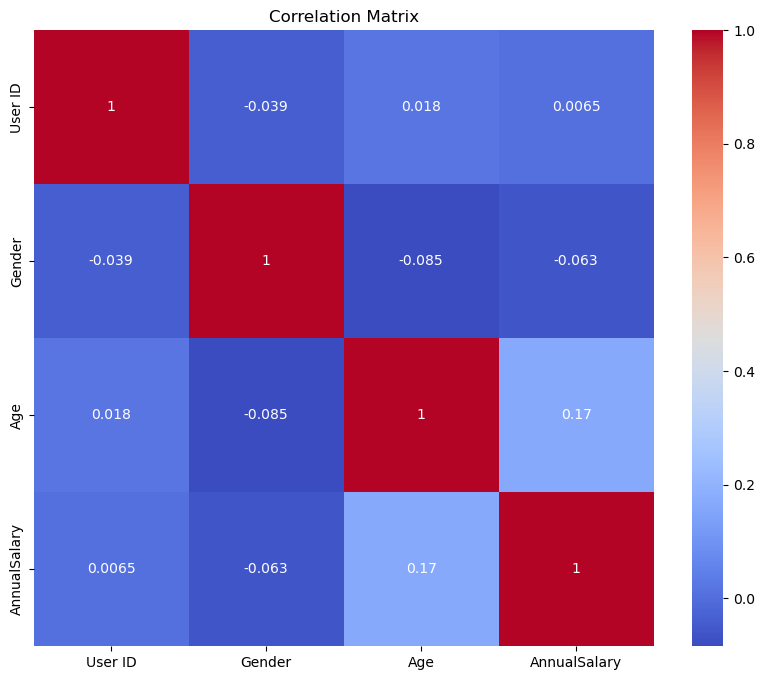

In [35]:

from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Create a copy of the dataframe
df_encoded = df.copy()

# Convert gender to numerical form using label encoding
le = LabelEncoder()
df_encoded['Gender'] = le.fit_transform(df_encoded['Gender'])

# Define the feature and target variables
features = df[['Gender', 'Age', 'AnnualSalary']]
target = df['Purchased']

# Calculate the correlation matrix
corr_matrix = df_encoded.corr()

# Plot the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


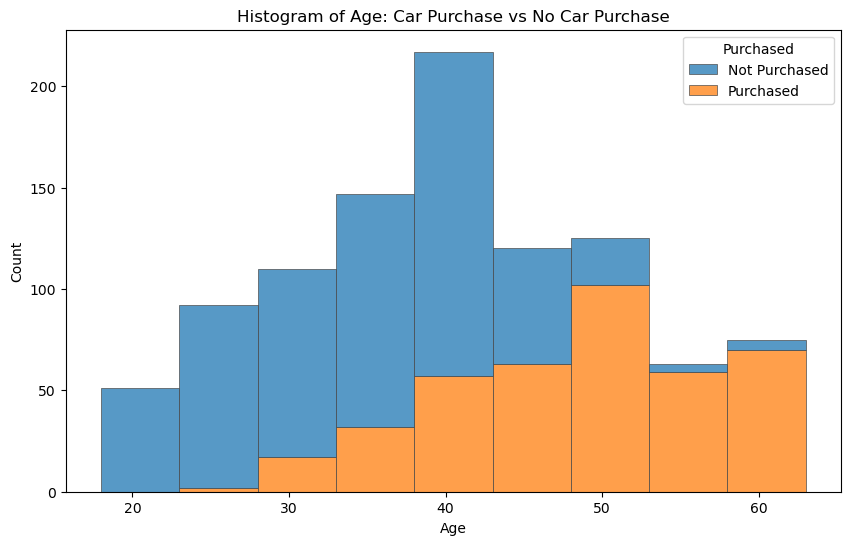

In [20]:
# Prepare data for seaborn plot
df['Purchased'] = df['Purchased'].map({0: 'Not Purchased', 1: 'Purchased'})

# Create a histogram to visualize the correlation between age and purchase decision
plt.figure(figsize=(10, 6))
sns.histplot(df, x='Age', hue='Purchased', multiple='stack', binwidth=5, edgecolor=".3", linewidth=.5)
plt.title('Histogram of Age: Car Purchase vs No Car Purchase')
plt.show()

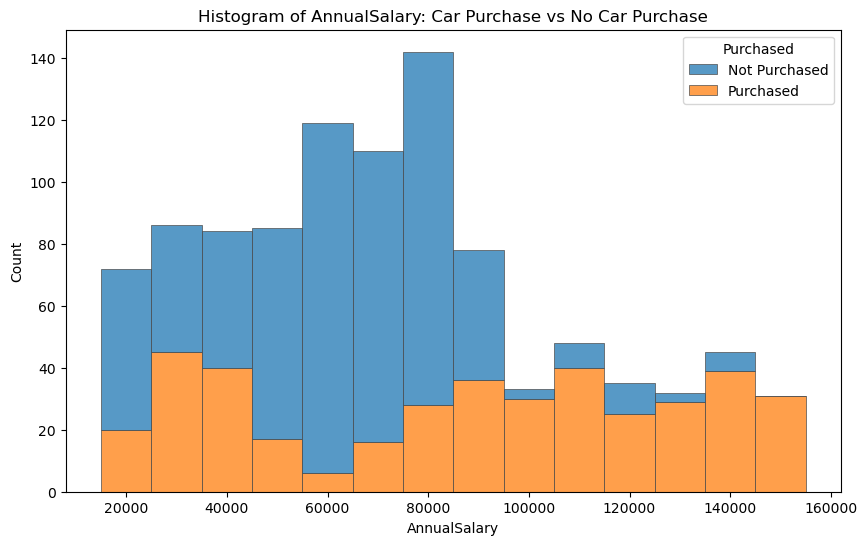

In [21]:
# Create a histogram to visualize the correlation between AnnualSalary and purchase decision
plt.figure(figsize=(10, 6))
sns.histplot(df, x='AnnualSalary', hue='Purchased', multiple='stack', binwidth=10000, edgecolor=".3", linewidth=.5)
plt.title('Histogram of AnnualSalary: Car Purchase vs No Car Purchase')
plt.show()

In [33]:
# Use Random Forest Classification to obtain "feature importance" and Model performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Prepare the data
X = df_encoded[['Gender', 'Age', 'AnnualSalary']]
y = df_encoded['Purchased']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict the test set results
y_pred = rf.predict(X_test)

# Evaluate model performance
print("Classification Report:\n", classification_report(y_test, y_pred))

#Calculate and show feature importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})

feature_importances


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       112
           1       0.91      0.84      0.88        88

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.90      0.89       200



,feature,importance
0,Gender,0.006698
1,Age,0.472784
2,AnnualSalary,0.520518


Discussion
The model achieved an accuracy of about 90% on the test data which is quite good. Feature importance data shows that Age and AnnualSalary are important factors in determining whether a car will be purchased or not. Gender is not an important factor. 

Now lets try a logistic regression model...

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Logistic Regression requires feature scaling for accurate results
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Initialize the Logistic Regression model
lr = LogisticRegression(random_state=42)

# Train the model
lr.fit(X_train_scaled, y_train)

# Predict the test set results
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate model performance
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# Get the model coefficients
coefficients = lr.coef_[0]

# Create a dataframe for visualization
coefficients_df = pd.DataFrame({
    'Feature': features.columns,
    'Coefficient': coefficients
})

coefficients_df

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.93      0.84       112
           1       0.87      0.62      0.73        88

    accuracy                           0.80       200
   macro avg       0.82      0.78      0.78       200
weighted avg       0.81      0.80      0.79       200



,Feature,Coefficient
0,Gender,0.215089
1,Age,2.258862
2,AnnualSalary,1.192937


Discussion
The logistic regression model achieved an accuracy of 80% on the test data, which is lower than that of the Random Forest model.

We can see from the coefficients that Age has a higher absolute value (2.26) than AnnualSalary (1.19), suggesting that according to the Logistic Regression model, Age is more important in predicting whether a person will purchase a car or not. This shows that different models can lead to different interpretations of feature importance, as the Random Forest model had AnnualSalary with the highest feature importance.